# Video games sales data analysis 1
Analysis of the dataset from https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings
It contains historical sales for game publishers.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

### Time series analysis
Shows which publisher has most sales(total sums of games sold in that year by that puiblisher) in given year from 1980 to 2016.

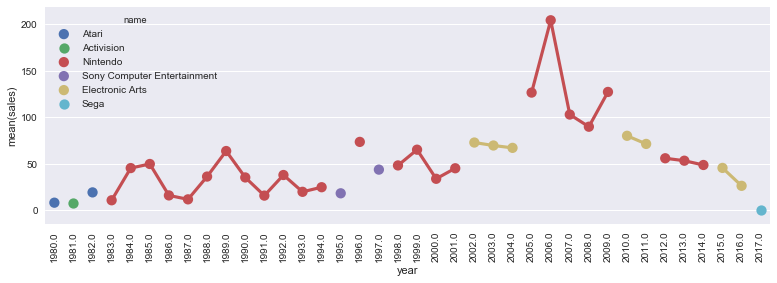

In [2]:
vg_df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
#sort table so that it is grouped by highest selling publisher per year (sum of sales for games) (reset_indfex to conver index to column)
temp=vg_df.groupby(['Year_of_Release', 'Publisher']).sum().reset_index().groupby('Year_of_Release')
#temp is sum of all variables for every publisher each year (so all sales of games are summed for particular published and stored in temp)
publisher_yearly_winner_df = pd.DataFrame()
#so we pass typle then set variables for iteration, we need set curreny year then max sales for a year annd from that choose winner
#we also create row as a dict which consist of year, publisher name, and how many sales
for year, group in temp: #this is passed in order to pass tuple of column, names not a series
    current_year=temp.get_group(year)  #this gets all publishers from a given year from the temp 
    max_year_sales=0.0
    winning_pub=""
    row={'year':"", "name":"", "sales":"" }
    for index, pub_data in current_year.iterrows(): #this gets row index and all the data in that index
        if pub_data.Global_Sales > max_year_sales: #then we access this data .
            max_year_sales=pub_data.Global_Sales
            winning_pub=pub_data.Publisher
            
    row['year']= year
    row['name']= winning_pub
    row['sales']=max_year_sales
    #print(row)
    #print(publisher_yearly_winner_df)
    publisher_yearly_winner_df = publisher_yearly_winner_df.append(row, ignore_index=True)
    
publisher_yearly_winner_df=publisher_yearly_winner_df.drop(publisher_yearly_winner_df.index[len(publisher_yearly_winner_df)-1])

fig = plt.figure(figsize=(13, 4))

ax = sns.pointplot(x = publisher_yearly_winner_df.year ,
              y = publisher_yearly_winner_df.sales , 
              hue = publisher_yearly_winner_df.name);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

###  Pointplot
Analyze which publisher is most popular in each of the regions (NA, EU, JP, Other)


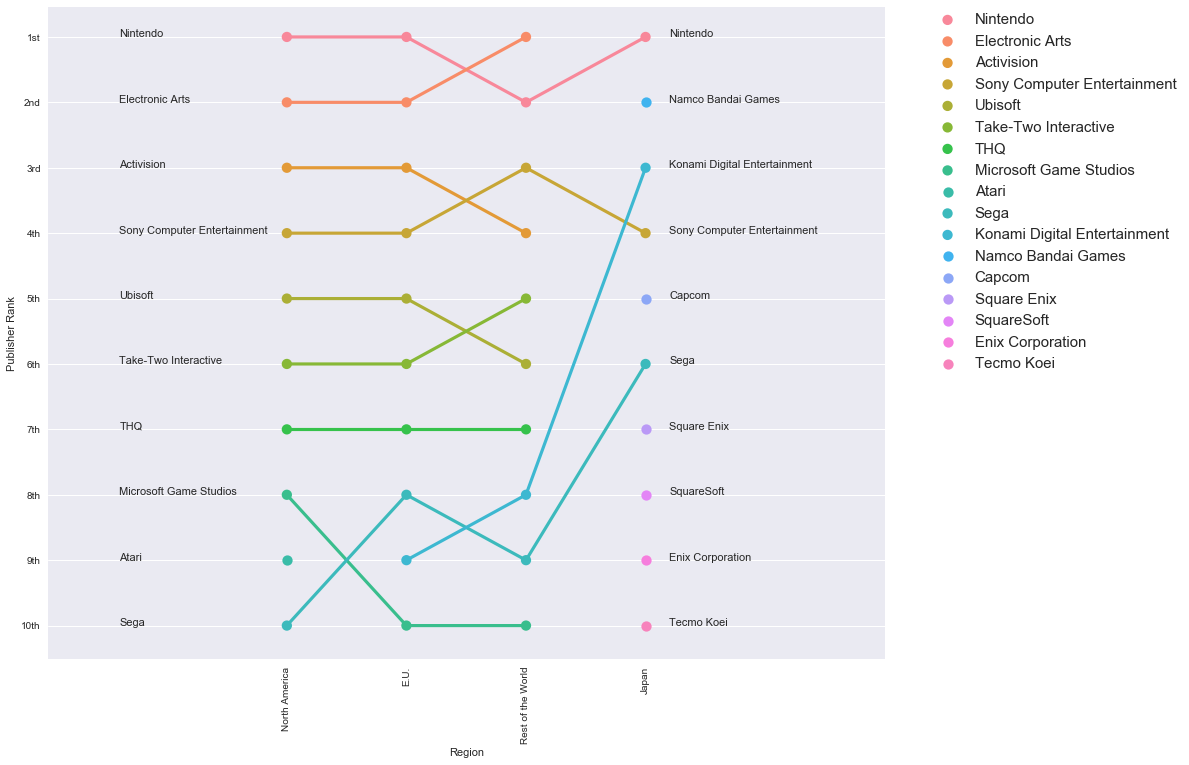

In [3]:
pub_geo_rankings = [vg_df.groupby('Publisher').sum().unstack().NA_Sales.sort_values(ascending=False).head(10).index, 
                      vg_df.groupby('Publisher').sum().unstack().EU_Sales.sort_values(ascending=False).head(10).index,
                      vg_df.groupby('Publisher').sum().unstack().Other_Sales.sort_values(ascending=False).head(10).index,
                      vg_df.groupby('Publisher').sum().unstack().JP_Sales.sort_values(ascending=False).head(10).index
                      ]
#add head for the sorted values to get top 10 from each
#First is the number of releases per genre, second is the sales per genre, third is the average sales per game per genre
pub_geo_rank_df = pd.DataFrame(columns=['publisher', 'rank_type', 'rank'])

#for metric in genre_difference_metric:
for region in range(4):
    for publisher in range(len(pub_geo_rankings[region])):
        pub_geo_rank_df = pub_geo_rank_df.append({'publisher':pub_geo_rankings[region][publisher], 'rank_type': region, 'rank':publisher},
                                   ignore_index=True)

fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111)

sns.pointplot(x=pub_geo_rank_df.rank_type,
              y=10-pub_geo_rank_df['rank'], 
              hue=pub_geo_rank_df.publisher)
for i in range(len(pub_geo_rankings[0])): #show names of publisher on the righ and left site of plots 
    ax.text(-1.4, 10-i, pub_geo_rankings[0][i], fontsize=11)
    ax.text(3.2, 10-i, pub_geo_rankings[3][i], fontsize=11)
    
ax.set_xlim([-2,5])

xs = [0.0, 1.0, 2.0, 3.0]
x_labels = ['North America', 'E.U.', 'Rest of the World', 'Japan']
plt.xticks(xs, x_labels, rotation='vertical')
ax.set_xlabel('Region')

ys = range(1,11)
y_labels = ['10th', '9th', '8th', '7th', '6th', '5th', '4th', '3rd', '2nd', '1st']
plt.yticks(ys, y_labels)
ax.set_ylabel('Publisher Rank')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size':15})

